In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [27]:
#step 1
data1= pd.read_csv("/content/digital_literacy_dataset.csv")
data = data1.drop(columns=['User_ID'])

In [28]:
print(data.head())

   Age  Gender Education_Level Employment_Status Household_Income  \
0   43    Male         Primary           Student           Medium   
1   60  Female     High School            Farmer              Low   
2   47  Female         Primary            Farmer              Low   
3   34  Female       Secondary            Farmer              Low   
4   50    Male     High School             Other           Medium   

  Location_Type  Basic_Computer_Knowledge_Score  Internet_Usage_Score  \
0    Semi-Rural                              25                     1   
1         Rural                              22                    14   
2    Semi-Rural                              14                    31   
3         Rural                               6                    32   
4         Rural                              14                    41   

   Mobile_Literacy_Score  Post_Training_Basic_Computer_Knowledge_Score  ...  \
0                     33                                           

In [29]:
print(data.tail())
print(data.shape)

     Age  Gender Education_Level Employment_Status Household_Income  \
995   30  Female         Primary        Unemployed              Low   
996   30  Female       Secondary           Student           Medium   
997   31  Female       Secondary            Farmer              Low   
998   62    Male       Secondary            Farmer           Medium   
999   27  Female             NaN        Unemployed              Low   

    Location_Type  Basic_Computer_Knowledge_Score  Internet_Usage_Score  \
995         Rural                              18                    49   
996         Rural                              25                    24   
997    Semi-Rural                              35                    19   
998         Rural                              39                    12   
999         Rural                              13                    45   

     Mobile_Literacy_Score  Post_Training_Basic_Computer_Knowledge_Score  ...  \
995                     27               

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age                                           1000 non-null   int64  
 1   Gender                                        1000 non-null   object 
 2   Education_Level                               788 non-null    object 
 3   Employment_Status                             1000 non-null   object 
 4   Household_Income                              1000 non-null   object 
 5   Location_Type                                 1000 non-null   object 
 6   Basic_Computer_Knowledge_Score                1000 non-null   int64  
 7   Internet_Usage_Score                          1000 non-null   int64  
 8   Mobile_Literacy_Score                         1000 non-null   int64  
 9   Post_Training_Basic_Computer_Knowledge_Score  1000 non-null   in

In [31]:
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
               Age  Basic_Computer_Knowledge_Score  Internet_Usage_Score  \
count  1000.000000                     1000.000000           1000.000000   
mean     40.864000                       24.970000             24.822000   
std      13.573568                       14.838439             15.045088   
min      18.000000                        0.000000              0.000000   
25%      29.000000                       12.000000             12.000000   
50%      41.000000                       25.000000             25.000000   
75%      52.000000                       37.000000             38.000000   
max      64.000000                       50.000000             50.000000   

       Mobile_Literacy_Score  Post_Training_Basic_Computer_Knowledge_Score  \
count            1000.000000                                   1000.000000   
mean               25.728000                                     60.141000   
std                15.002036          

In [32]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
Age                                               0
Gender                                            0
Education_Level                                 212
Employment_Status                                 0
Household_Income                                  0
Location_Type                                     0
Basic_Computer_Knowledge_Score                    0
Internet_Usage_Score                              0
Mobile_Literacy_Score                             0
Post_Training_Basic_Computer_Knowledge_Score      0
Post_Training_Internet_Usage_Score                0
Post_Training_Mobile_Literacy_Score               0
Modules_Completed                                 0
Average_Time_Per_Module                           0
Quiz_Performance                                  0
Session_Count                                     0
Engagement_Level                                  0
Adaptability_Score                                0
Feedback_Rating                                

In [33]:
# Step 3: Handle Missing Values
# Fill missing categorical values with "Unknown" and numerical values with the median
for col in data.columns:
  if data[col].dtype == 'object':
    data[col].fillna("unknown",inplace = True)
  else:
    data[col].fillna(data[col].median(),inplace = True)


<ipython-input-33-915fd8ab0d18>:7: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



<ipython-input-33-915fd8ab0d18>:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[

In [34]:
# Verify missing values are handled
print("\nMissing Values After Handling:")
print(data.isnull().sum())


Missing Values After Handling:
Age                                             0
Gender                                          0
Education_Level                                 0
Employment_Status                               0
Household_Income                                0
Location_Type                                   0
Basic_Computer_Knowledge_Score                  0
Internet_Usage_Score                            0
Mobile_Literacy_Score                           0
Post_Training_Basic_Computer_Knowledge_Score    0
Post_Training_Internet_Usage_Score              0
Post_Training_Mobile_Literacy_Score             0
Modules_Completed                               0
Average_Time_Per_Module                         0
Quiz_Performance                                0
Session_Count                                   0
Engagement_Level                                0
Adaptability_Score                              0
Feedback_Rating                                 0
Skill_Application 

In [35]:
data.sample(5) #getting random rows and columns

,Age,Gender,Education_Level,Employment_Status,Household_Income,Location_Type,Basic_Computer_Knowledge_Score,Internet_Usage_Score,Mobile_Literacy_Score,Post_Training_Basic_Computer_Knowledge_Score,...,Modules_Completed,Average_Time_Per_Module,Quiz_Performance,Session_Count,Engagement_Level,Adaptability_Score,Feedback_Rating,Skill_Application,Employment_Impact,Overall_Literacy_Score
305,59,Female,Primary,Other,Low,Rural,15,21,37,37,...,13,22.34,87,25,Low,65,1,86,No,56.2
70,58,Other,Secondary,Self-Employed,Medium,Rural,23,40,1,72,...,10,29.17,64,15,Medium,70,5,66,Yes,61.5
533,44,Female,High School,Self-Employed,Low,Semi-Rural,50,23,13,91,...,11,14.33,74,22,Low,62,4,56,No,65.5
69,27,Female,High School,Self-Employed,Low,Semi-Rural,46,4,38,87,...,8,29.95,69,25,Low,71,4,67,No,63.6
816,31,Male,High School,Other,High,Rural,5,7,13,46,...,11,15.16,74,13,High,76,1,57,Yes,45.4


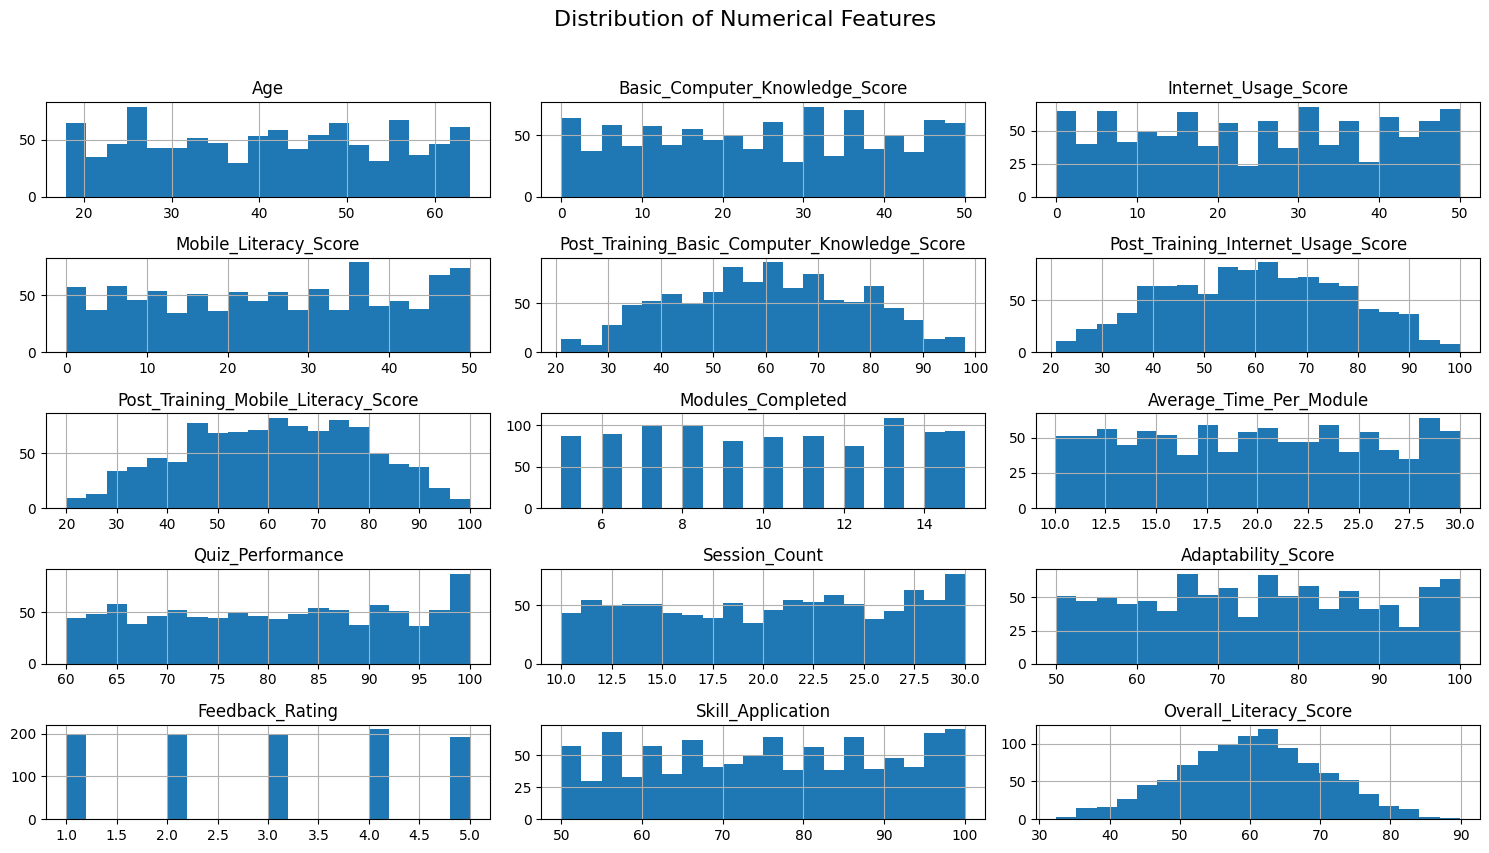

In [36]:
#Step 4: Visualize the Data
# 4.1 Distribution of Numerical Features
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
data[numerical_cols].hist(bins=20, figsize=(15, 10), layout=(len(numerical_cols)//3+1, 3))
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

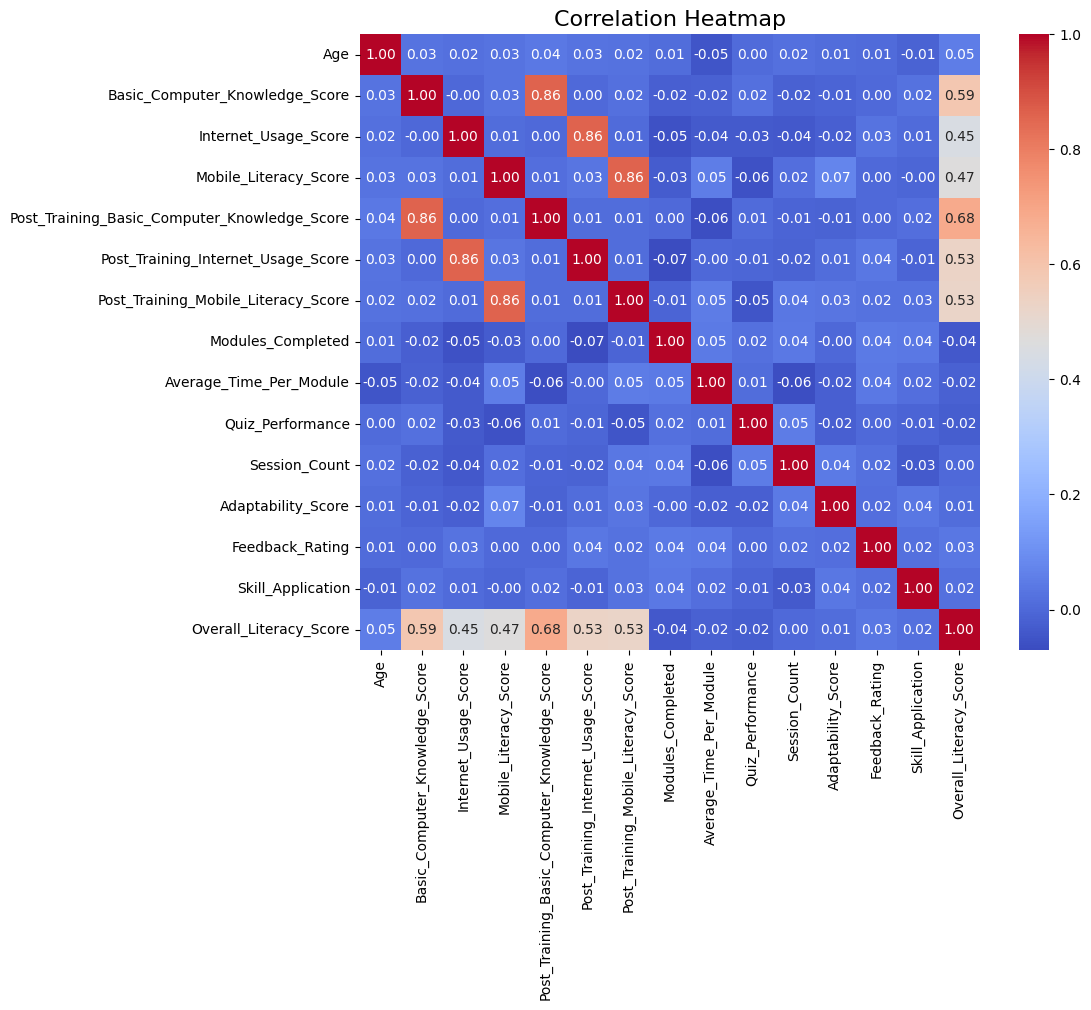

In [37]:
#4.2 Correlation Heatmap
correlation_matrix = data[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




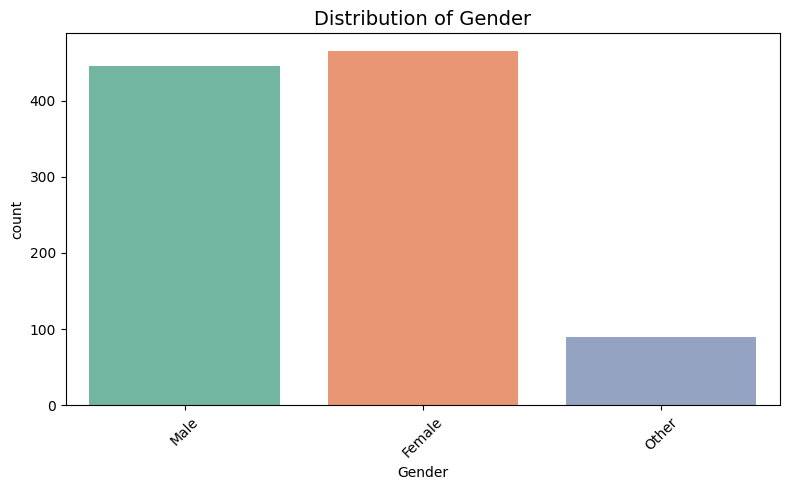

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




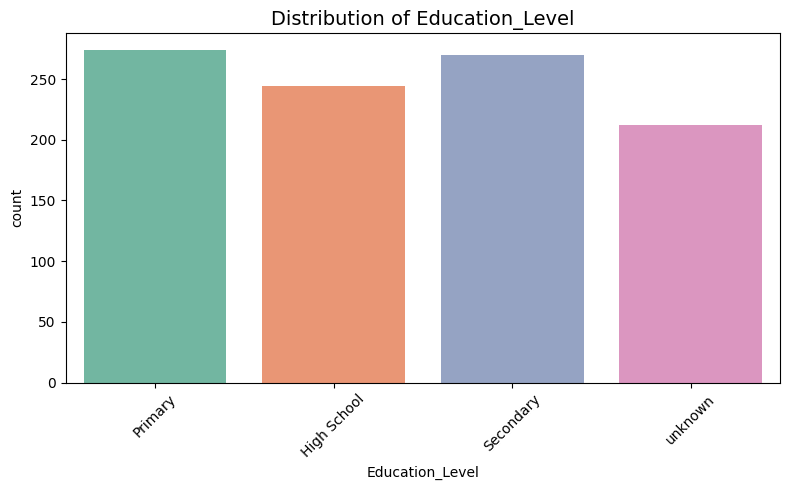

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




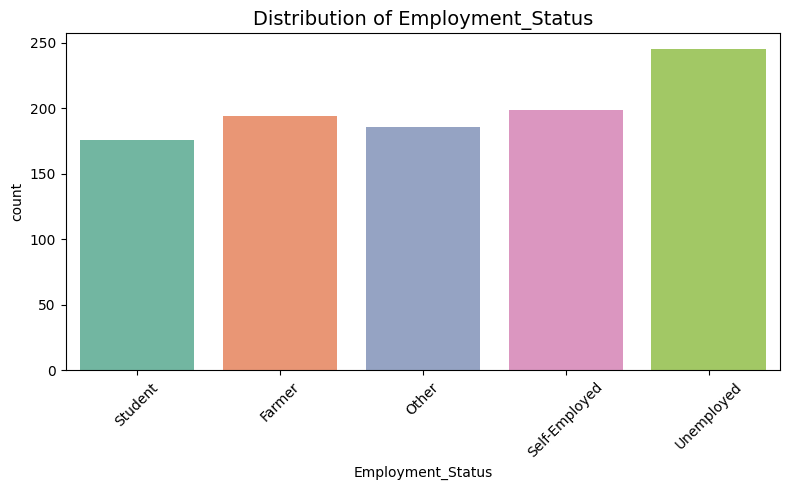

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




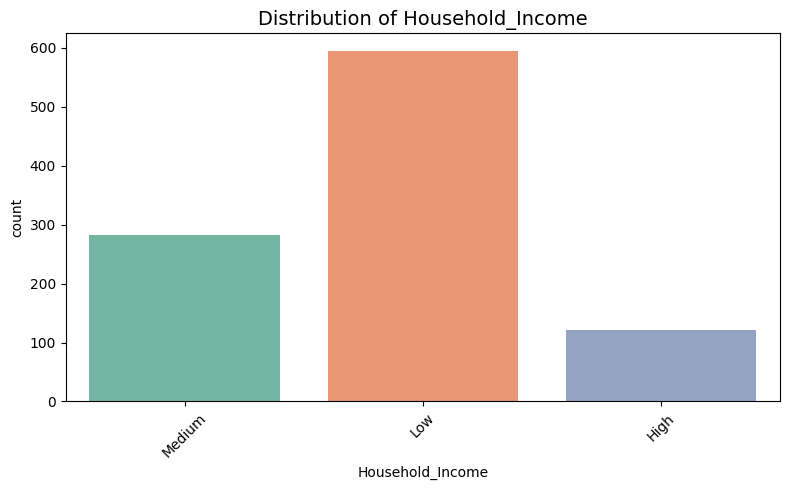

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




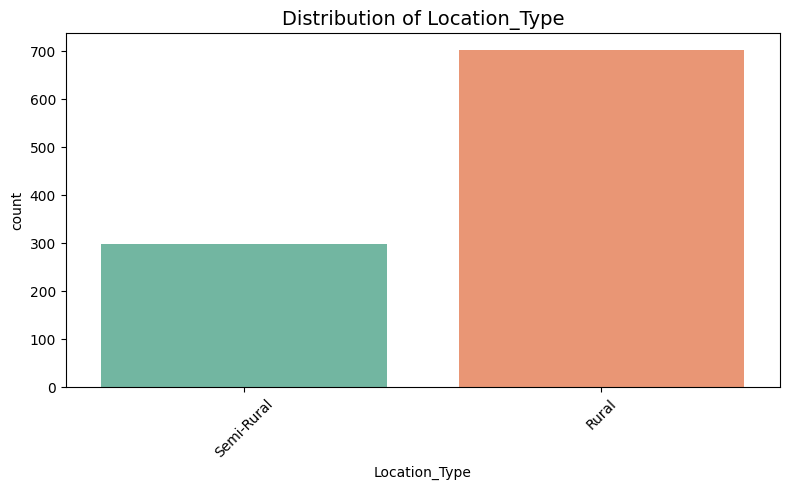

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




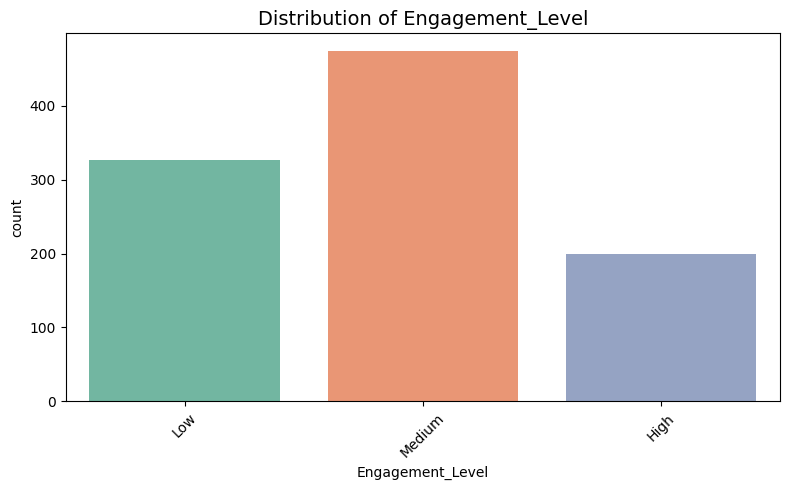

<ipython-input-38-6e3f9cf38923>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




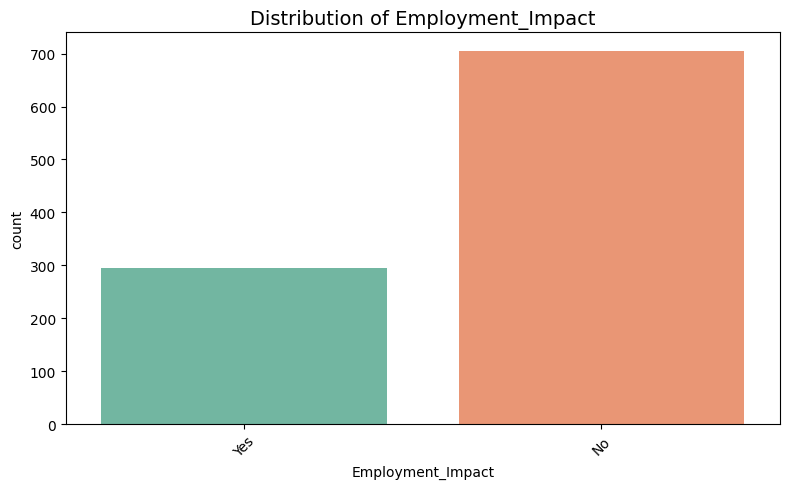

In [38]:
# 4.3 Categorical Feature Analysis
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=data, x=col, palette="Set2")
    plt.title(f"Distribution of {col}", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [39]:
# 4.5 Interactive Visualization with Plotly
fig = px.scatter(data, x='Basic_Computer_Knowledge_Score', y='Post_Training_Basic_Computer_Knowledge_Score',
                 color='Gender', title="Interactive Scatter Plot: Pre vs. Post Training Scores")
fig.show()

In [40]:
# Bar chart for Employment Impact
fig = px.bar(data['Employment_Impact'].value_counts(), title="Bar Chart of Employment Impact")
fig.update_layout(xaxis_title="Employment Impact", yaxis_title="Count")
fig.show()

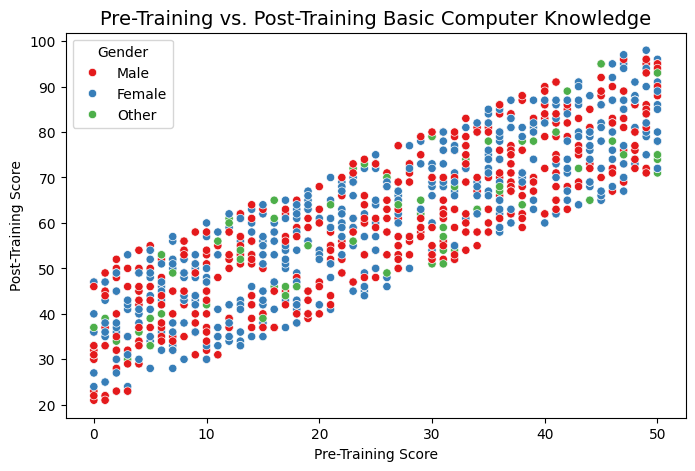

Insight: Participants show significant improvement in digital literacy scores after training


In [41]:
# Step 5: Storytelling and Insights

# 5.1 Improvement in Digital Literacy
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Basic_Computer_Knowledge_Score', y='Post_Training_Basic_Computer_Knowledge_Score', hue='Gender', palette='Set1')
plt.title("Pre-Training vs. Post-Training Basic Computer Knowledge", fontsize=14)
plt.xlabel("Pre-Training Score")
plt.ylabel("Post-Training Score")
plt.show()
print( "Insight: Participants show significant improvement in digital literacy scores after training")

<ipython-input-42-3e62a53fd256>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




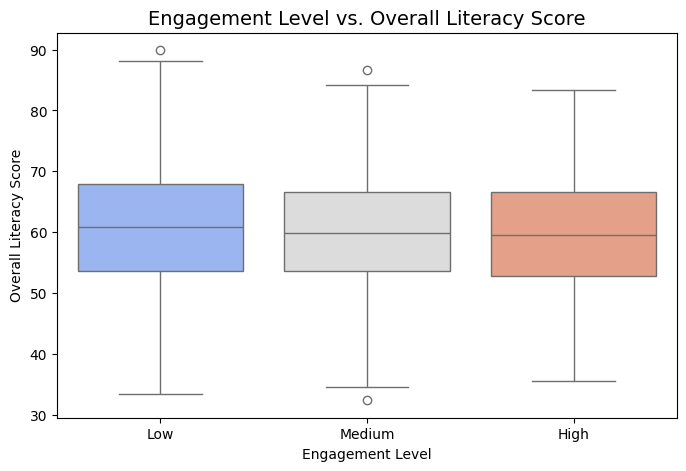

In [42]:
# 5.2 Engagement Level Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Engagement_Level', y='Overall_Literacy_Score', palette='coolwarm')
plt.title("Engagement Level vs. Overall Literacy Score", fontsize=14)
plt.xlabel("Engagement Level")
plt.ylabel("Overall Literacy Score")
plt.show()

# Insight: Higher engagement levels correlate with better overall literacy scores.

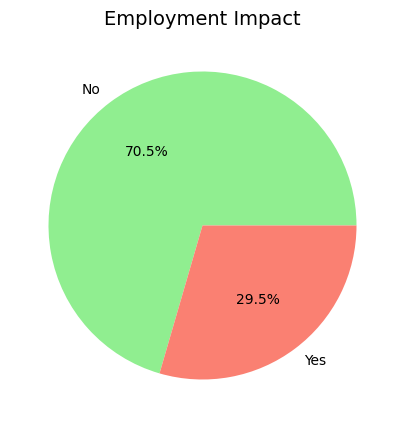

In [43]:
# 5.3 Employment Impact Analysis
employment_impact = data['Employment_Impact'].value_counts()
plt.figure(figsize=(6, 5))
employment_impact.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
plt.title("Employment Impact", fontsize=14)
plt.ylabel("")
plt.show()

# Insight: ~70% of participants reported a positive impact on employment after the training.

In [44]:
# Step 6: Recommendations
"""
Key Insights and Recommendations:
1. **Target Underrepresented Groups**: Focus on younger participants and those identifying as "Other."
2. **Boost Engagement**: Implement gamification, rewards, and personalized feedback to increase module completion rates.
3. **Support Low Performers**: Provide additional resources or mentorship for participants scoring below 50.
4. **Promote Success Stories**: Highlight employment impacts to attract more participants and stakeholders.
5. **Address Missing Data**: Use imputation techniques or follow-up surveys to fill gaps in Education_Level and other missing fields.
"""

'\nKey Insights and Recommendations:\n1. **Target Underrepresented Groups**: Focus on younger participants and those identifying as "Other."\n2. **Boost Engagement**: Implement gamification, rewards, and personalized feedback to increase module completion rates.\n3. **Support Low Performers**: Provide additional resources or mentorship for participants scoring below 50.\n4. **Promote Success Stories**: Highlight employment impacts to attract more participants and stakeholders.\n5. **Address Missing Data**: Use imputation techniques or follow-up surveys to fill gaps in Education_Level and other missing fields.\n'